In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install kaggle



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import zipfile
import json


In [5]:
with open("kaggle.json") as f:
    kaggle_token = json.load(f)
os.environ['KAGGLE_USERNAME'] = kaggle_token['username']
os.environ['KAGGLE_KEY'] = kaggle_token['key']


In [6]:
!kaggle datasets download -d carrie1/ecommerce-data

Dataset URL: https://www.kaggle.com/datasets/carrie1/ecommerce-data
License(s): unknown
ecommerce-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
with zipfile.ZipFile("ecommerce-data.zip", "r") as zip_ref:
    zip_ref.extractall("ecommerce-data")


In [8]:
df = pd.read_csv("ecommerce-data/data.csv", encoding_errors='replace')


In [9]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df.shape

(541909, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df.duplicated().sum()

np.int64(5268)

In [16]:
df_cleaned=df.dropna()

In [17]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


C:\Users\ARYAN\AppData\Local\Temp\ipykernel_20908\1417334730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


In [18]:
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour


C:\Users\ARYAN\AppData\Local\Temp\ipykernel_20908\1367514270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_20908\1367514270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_20908\1367514270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [19]:
df_cleaned['Total_price']=np.multiply(df_cleaned['Quantity'],df['UnitPrice'])

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_20908\2942468885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total_price']=np.multiply(df_cleaned['Quantity'],df['UnitPrice'])


### 1. Top 10 selling products

In [20]:
top_products=df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

In [21]:
top_products.head(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64

### 2. Monthly sales trend

In [22]:
monthly_sales=df_cleaned.groupby(['Month','Year'])['Total_price'].sum().reset_index()

In [23]:
monthly_sales

,Month,Year,Total_price
0,1,2011,475074.380
1,2,2011,436546.150
2,3,2011,579964.610
3,4,2011,426047.851
4,5,2011,648251.080
5,6,2011,608013.160
6,7,2011,574238.481
7,8,2011,616368.000
8,9,2011,931440.372
9,10,2011,974603.590


<Axes: xlabel='Month', ylabel='Total_price'>

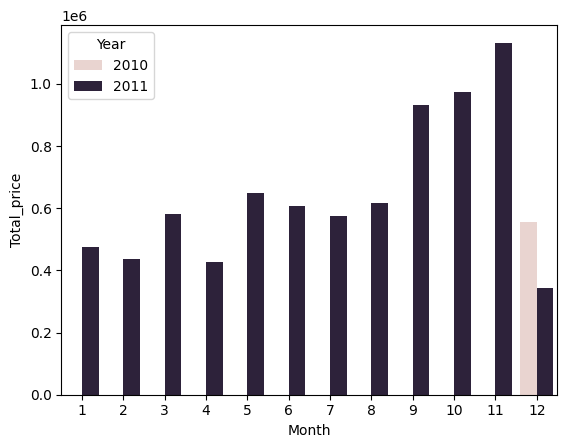

In [24]:
sns.barplot(monthly_sales,x='Month',y='Total_price',hue='Year')


### 3. Top 5 Countries by Total Revenue

In [25]:
top_countries = df_cleaned.groupby('Country')['Total_price'].sum().sort_values(ascending=False).head(5).reset_index()


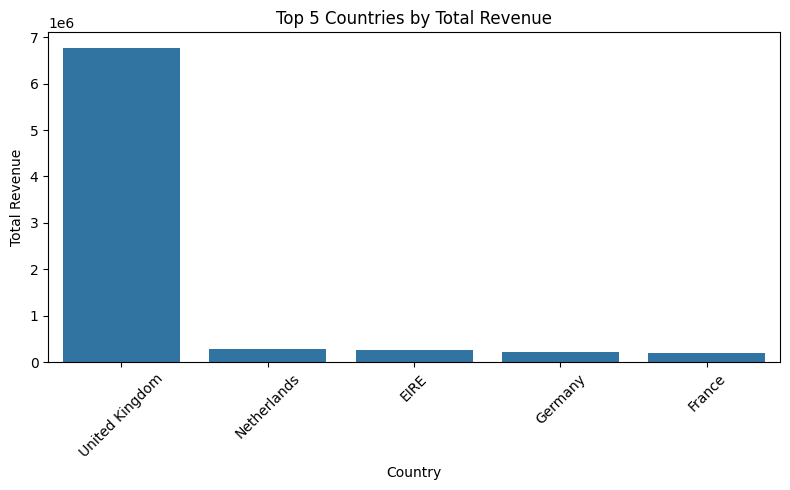

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_countries, x='Country', y='Total_price')
plt.title('Top 5 Countries by Total Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Monthly Customer visits

In [27]:
monthly_customers=df_cleaned.groupby('Month')['CustomerID'].nunique().reset_index(name='Customer_visits')



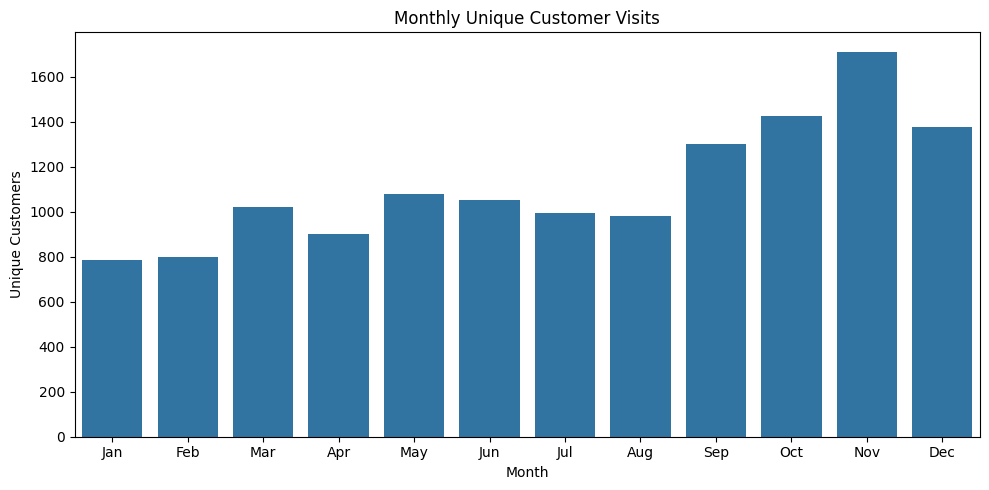

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_customers, x='Month', y='Customer_visits')
plt.title('Monthly Unique Customer Visits')
plt.ylabel('Unique Customers')
plt.xlabel('Month')
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()

### 5. Most Sold item in each month

In [29]:
top_stock_each_month = df_cleaned.sort_values(['Month', 'Quantity'], ascending=[True, False])\
                                    .groupby('Month').first().reset_index()


In [30]:
top_stock_each_month[['Month', 'StockCode', 'Description', 'Quantity']]


,Month,StockCode,Description,Quantity
0,1,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215
1,2,22053,EMPIRE DESIGN ROSETTE,3906
2,3,21967,PACK OF 12 SKULL TISSUES,2160
3,4,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114
4,5,22197,SMALL POPCORN HOLDER,4300
5,6,16216,LETTER SHAPE PENCIL SHARPENER,1600
6,7,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186
7,8,84879,ASSORTED COLOUR BIRD ORNAMENT,2880
8,9,23288,GREEN VINTAGE SPOT BEAKER,1944
9,10,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800


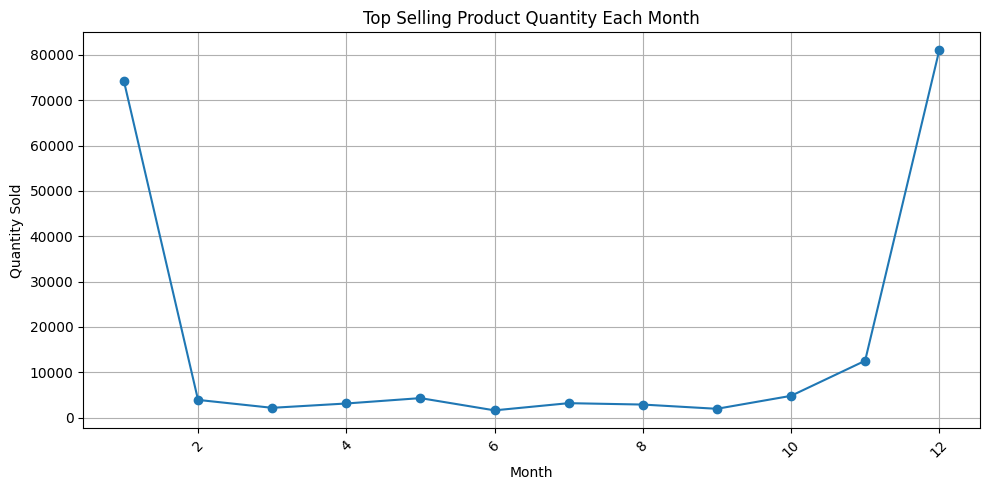

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(top_stock_each_month['Month'], top_stock_each_month['Quantity'], marker='o')
plt.title('Top Selling Product Quantity Each Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 6. Top 10 stock by revenue

In [32]:
top_stock_by_revenue=df_cleaned.groupby(['StockCode', 'Description'])['Total_price']\
                      .sum().sort_values(ascending=False).reset_index().head(10)

print(top_stock_by_revenue)

  StockCode                         Description  Total_price
0     22423            REGENCY CAKESTAND 3 TIER    132870.40
1    85123A  WHITE HANGING HEART T-LIGHT HOLDER     93823.85
2    85099B             JUMBO BAG RED RETROSPOT     83236.76
3     47566                       PARTY BUNTING     67687.53
4      POST                             POSTAGE     66710.24
5     84879       ASSORTED COLOUR BIRD ORNAMENT     56499.22
6     23084                  RABBIT NIGHT LIGHT     51137.80
7     79321                       CHILLI LIGHTS     45936.81
8     22086     PAPER CHAIN KIT 50'S CHRISTMAS      41500.48
9     22502      PICNIC BASKET WICKER 60 PIECES     39619.50


### 

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_20908\3829595637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_price', y='Description', data=top_stock_by_revenue, palette='viridis')


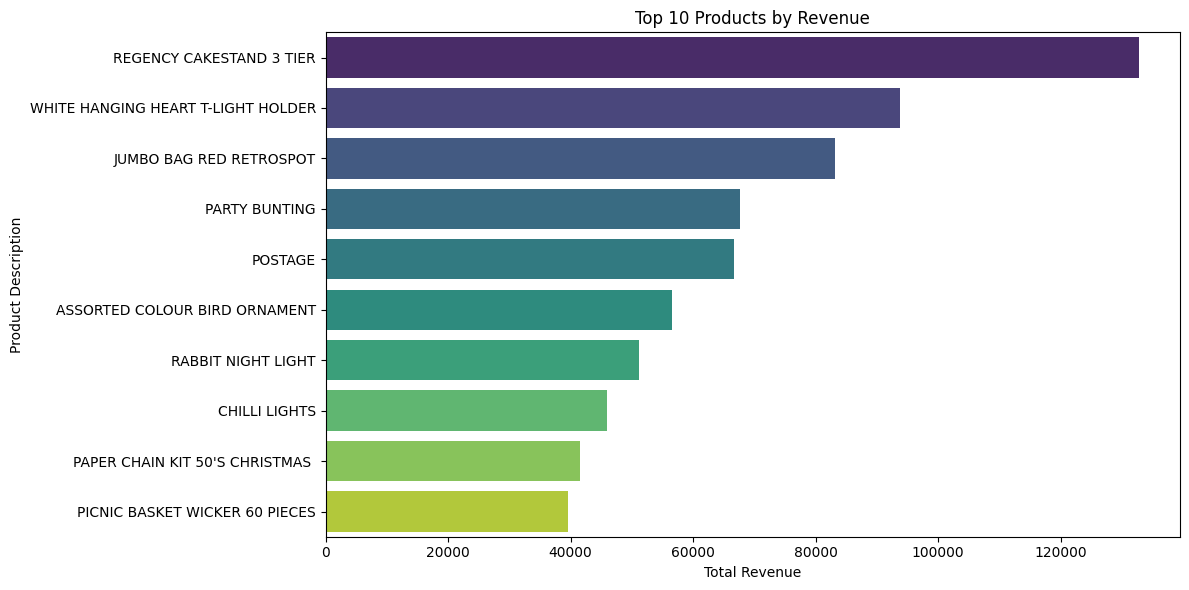

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_price', y='Description', data=top_stock_by_revenue, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

### 7. Worst 10 stock by revenue

In [42]:
worst_stock_by_revenue=df_cleaned.groupby(['StockCode', 'Description'])['Total_price']\
                      .sum().sort_values(ascending=True).reset_index().head(10)

print(worst_stock_by_revenue)

  StockCode                      Description  Total_price
0         M                           Manual    -58385.46
1      CRUK                  CRUK Commission     -7933.43
2         D                         Discount     -5696.22
3     22769     CHALKBOARD KITCHEN ORGANISER       -87.80
4    79323W              WHITE CHERRY LIGHTS       -54.00
5     85063   CREAM SWEETHEART MAGAZINE RACK       -46.85
6     35400      WOODEN BOX ADVENT CALENDAR        -45.70
7     21645  ASSORTED TUTTI FRUTTI ROUND BOX       -39.60
8    79323P               PINK CHERRY LIGHTS       -27.00
9     20703          BLUE PADDED SOFT MOBILE       -25.50


C:\Users\ARYAN\AppData\Local\Temp\ipykernel_20908\3333793824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_price', y='Description', data=worst_stock_by_revenue, palette='coolwarm')


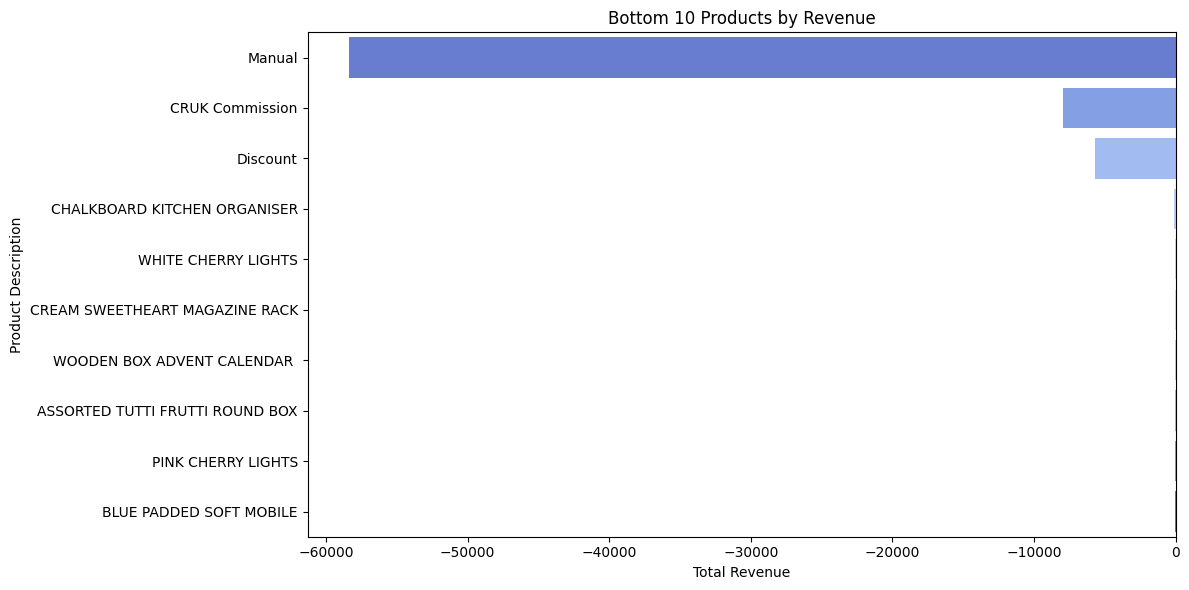

In [43]:
worst_stock_by_revenue = worst_stock_by_revenue.sort_values(by='Total_price')

plt.figure(figsize=(12, 6))
sns.barplot(x='Total_price', y='Description', data=worst_stock_by_revenue, palette='coolwarm')
plt.title('Bottom 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

### 8. Country-wise product preference	What sells best in which country? Helps target local demand.

In [34]:
country_product_qty = df_cleaned.groupby(['Country', 'Description'])['Quantity']\
                                .sum().reset_index()

# Get the top product by quantity per country
top_by_country = country_product_qty.sort_values(['Country', 'Quantity'], ascending=[True, False])\
                                    .groupby('Country').first().reset_index()

print(top_by_country)


                 Country                          Description  Quantity
0              Australia              MINI PAINT SET VINTAGE       2916
1                Austria     SET 12 KIDS COLOUR  CHALK STICKS       288
2                Bahrain           ICE CREAM SUNDAE LIP GLOSS        96
3                Belgium      PACK OF 72 RETROSPOT CAKE CASES       480
4                 Brazil                 DOLLY GIRL LUNCH BOX        24
5                 Canada           RETRO COFFEE MUGS ASSORTED       504
6        Channel Islands                         RAIN PONCHO        407
7                 Cyprus       HEART DECORATION PAINTED ZINC        384
8         Czech Republic   WOODEN STAR CHRISTMAS SCANDINAVIAN        72
9                Denmark               RED  HARMONICA IN BOX        288
10                  EIRE      PACK OF 72 RETROSPOT CAKE CASES      1632
11    European Community       RED ROCKING HORSE HAND PAINTED        24
12               Finland      CHILDRENS CUTLERY POLKADOT PINK   

C:\Users\ARYAN\AppData\Local\Temp\ipykernel_20908\3105478584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Quantity', y='Country', data=top_by_country, palette='magma')


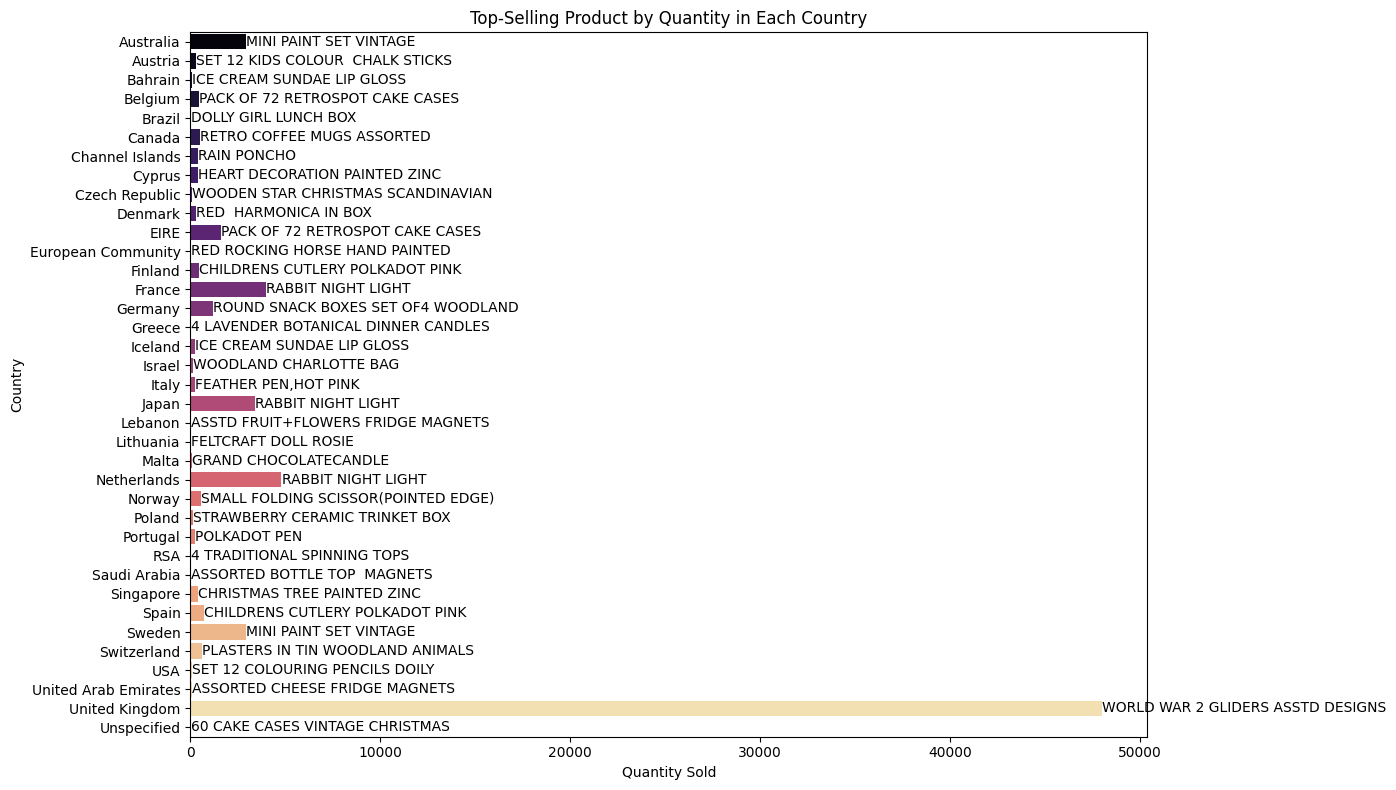

In [44]:
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='Quantity', y='Country', data=top_by_country, palette='magma')

# Add text labels
for index, row in top_by_country.iterrows():
    plt.text(row['Quantity'] + 2, index, row['Description'], va='center')

plt.title('Top-Selling Product by Quantity in Each Country')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
